In [8]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
import os
import cv2
import matplotlib.pyplot as plt  

In [10]:
path='drive/My Drive/brain_tumor'

In [12]:
list(os.listdir(path+'/Training'))

['meningioma_tumor', 'pituitary_tumor', 'glioma_tumor', 'no_tumor']

In [14]:
labels=['meningioma_tumor', 'pituitary_tumor', 'glioma_tumor', 'no_tumor']
class_map={
    'no_tumor':0,
    'glioma_tumor':1,
    'meningioma_tumor':2,
    'pituitary_tumor':3
}

Images=[]
Labels=[]
h,w=224,224

In [ ]:
drive/My Drive/brain_tumar/Training/imageName

## Read Data

In [16]:
for label in labels:
  folderpath=os.path.join(path+'/Training/',label)
  for j in os.listdir(folderpath):
    img=cv2.imread(os.path.join(folderpath,j))
    img=cv2.resize(img,(h,w))
    Images.append(img)
    Labels.append(class_map[label])

In [17]:
for label in labels:
  folderpath=os.path.join(path+'/Testing/',label)
  for j in os.listdir(folderpath):
    img=cv2.imread(os.path.join(folderpath,j))
    img=cv2.resize(img,(h,w))
    Images.append(img)
    Labels.append(class_map[label])

In [19]:
import numpy as np

In [20]:
X=np.array(Images)
y=np.array(Labels)

In [21]:
X.shape,y.shape

((3264, 224, 224, 3), (3264,))

# Visualization

In [29]:
import matplotlib.image as implot
plt.figure(figsize=(16,12))




<Figure size 1152x864 with 0 Axes>

<Figure size 1152x864 with 0 Axes>

In [56]:
os.listdir(path+labels[0])[10]

'm1(104).jpg'

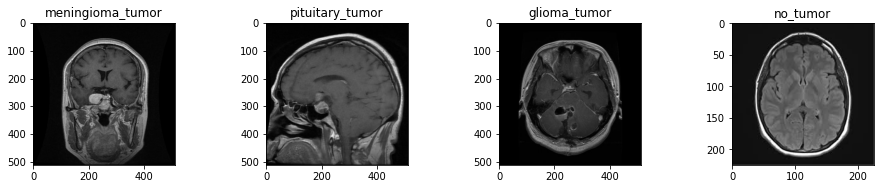

In [51]:
path='drive/My Drive/brain_tumor/Training/'
plt.figure(figsize=(16,12))


fileName=[os.listdir(path+labels[0])[5],os.listdir(path+labels[1])[0],os.listdir(path+labels[2])[0],os.listdir(path+labels[3])[0]]

for i in range(4):
  ax=plt.subplot(4,4,i+1)
  img=implot.imread(path+labels[i]+'/'+fileName[i]) #'drive/My Drive/brain_tumor/Training/class_name(floder)/imagename.jpg'
 #/ img=img.resize(img,(h,w))
  plt.imshow(img)
  plt.title(labels[i])

In [57]:
from sklearn.utils import shuffle
X,y=shuffle(X,y)

In [72]:
from tensorflow.keras.utils import to_categorical
y=to_categorical(y)

In [80]:
from sklearn.model_selection import train_test_split 
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.2)

In [70]:
import tensorflow
from tensorflow import keras 
from keras import Sequential
from keras.layers import Dropout,Dense
from keras.applications.vgg19 import VGG19


base_model=VGG19(
    input_shape=(h,w,3),
    weights='imagenet',
    include_top=False,
    pooling='max'
)
base_model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [74]:
model=Sequential([
                  base_model,
                  Dropout(0.4),
                  Dense(4,activation='softmax')
])

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 512)               20024384  
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 4)                 2052      
Total params: 20,026,436
Trainable params: 20,026,436
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history=model.fit(train_X,train_y,epochs=5,batch_size=32)


Epoch 1/5
82/82 [==============================] - 6513s 79s/step - loss: 2.6139 - accuracy: 0.2945
Epoch 2/5
58/82 [====================>.........] - ETA: 31:49 - loss: 1.3385 - accuracy: 0.3217